# Create baselines from absolute GNSS data

Because of 6 showing that absolute and basline data dont match

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
from numpy import linalg as LA
from functools import reduce
import os
import sys
import time
import datetime 
import pandas as pd
import geopandas as gpd

from shapely.geometry import Point
import shapely
import fiona

In [3]:
#with only the site_units that have data over the time period
site_units = [['tal1', 'arc2'], ['tal2', 'arc1'], ['tac2', 'arc5'], ['tac3', 'arc4'], ['tar2', 'arc6']] #these are the ones with data

dfs = {}  #dataframes

for site, unit in site_units:
    dfs[unit] = gpd.read_file(f"/Volumes/arc_04/whitefar/DATA/TASMAN/GNSS_ABSOLUTE/GNSS_dataframe/{site+unit}_moreattributes.shp")

In [7]:
dfs.keys()

dict_keys(['arc2', 'arc1', 'arc5', 'arc4', 'arc6'])

In [25]:
pairs = ['arc5arc4', 'arc1arc4', 'arc2arc1', 'arc2arc5', 'arc5arc6', 'arc1arc5', 'arc4arc6', 'arc1arc6']

baselines = {}
for pair in pairs:
    
    
    site1 = pair[:4]
    site2 = pair[4:]
    print(site1,"  ",site2)
    
    baselines[pair] = pd.DataFrame()
    baselines[pair]["x"] =  pd.Series(abs(dfs[site1].geometry.x - dfs[site2].geometry.x))
    baselines[pair]["y"] =  pd.Series(abs(dfs[site1].geometry.y - dfs[site2].geometry.y))
    baselines[pair]["Timestamp"] = dfs[site1].Timestamp

arc5    arc4
arc1    arc4
arc2    arc1
arc2    arc5
arc5    arc6
arc1    arc5
arc4    arc6
arc1    arc6


### download baselines

In [21]:
ddf = {} #dictionary of dataframes

for df in pairs:
    ddf[df] =  pd.read_csv(f"/Volumes/arc_04/whitefar/DATA/TASMAN/GNSS_relative/DATAFRAME/dataframe_{df}_may1-18_2016.csv",header=0,usecols=['dNorth','dEast','Timestamp'])

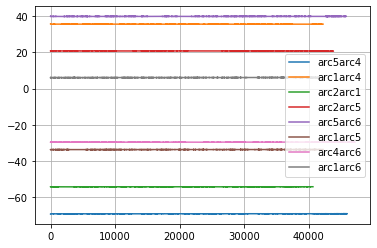

In [35]:
for pear in pairs:
    plt.plot(baselines[pear].x - abs(ddf[pear].dEast))
plt.legend(pairs)
plt.grid()

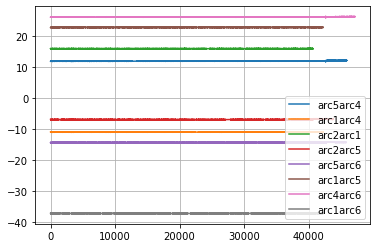

In [37]:
for pear in pairs:
    plt.plot(baselines[pear].y - abs(ddf[pear].dNorth))
plt.legend(pairs)
plt.grid()

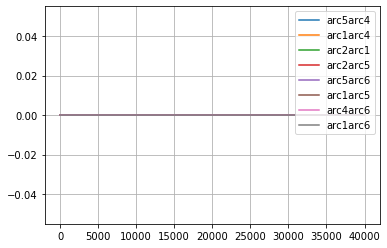

In [41]:
for pear in pairs:
    plt.plot(baselines[pear].Timestamp[:40000] - ddf[pear].Timestamp[:40000])
plt.legend(pairs)
plt.grid()

In [32]:
ddf['arc1arc5']

,dNorth,dEast,Timestamp
0,-1027.8845,-747.8952,1.462018e+09
1,-1027.8953,-747.9113,1.462018e+09
2,-1027.8929,-747.9095,1.462018e+09
3,-1027.8956,-747.9082,1.462018e+09
4,-1027.8917,-747.9081,1.462018e+09
...,...,...,...
42222,-1027.2057,-748.1098,1.463285e+09
42223,-1027.2097,-748.1157,1.463285e+09
42224,-1027.2075,-748.1097,1.463285e+09
42225,-1027.2085,-748.1123,1.463285e+09


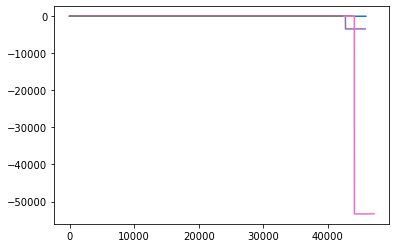

In [36]:
for pear in pairs:
    plt.plot(baselines[pear].Timestamp - abs(ddf[pear].Timestamp))